# Atividade 4 - Curvas ROC e AUC

## Análise de Predição de Doenças Cardíacas (Framingham Heart Study)

**Objetivo:** Construir e comparar classificadores para prever o risco de doença cardíaca em 10 anos (TenYearCHD)

## 1. Importação de Bibliotecas e Carregamento dos Dados

In [1]:
# ============================================================
# BLOCO 1: IMPORTAÇÃO DE BIBLIOTECAS
# ============================================================
# Importações necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    roc_curve, roc_auc_score, classification_report,
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
)
import warnings
warnings.filterwarnings('ignore')

# Configuração de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

In [2]:
# ============================================================
# BLOCO 2: CARREGAMENTO DOS DADOS
# ============================================================
# Carregamento dos dados
url = "https://raw.githubusercontent.com/laerciosantos09/Senac-MachineLearning/refs/heads/main/Atividade%20%204/framingham.csv"
heart_df = pd.read_csv(url)

print(f"Dimensões do dataset: {heart_df.shape}")
print(f"\nPrimeiras linhas:")
heart_df.head()

Dimensões do dataset: (4238, 16)

Primeiras linhas:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## 2. Exploração dos Dados (EDA)

In [3]:
# ============================================================
# BLOCO 3: INFORMAÇÕES BÁSICAS DO DATASET
# ============================================================
# Informações básicas do dataset
print("=" * 60)
print("INFORMAÇÕES DO DATASET")
print("=" * 60)
heart_df.info()

INFORMAÇÕES DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage:

In [4]:
# ============================================================
# BLOCO 4: ESTATÍSTICAS DESCRITIVAS
# ============================================================
# Estatísticas descritivas
print("\n" + "=" * 60)
print("ESTATÍSTICAS DESCRITIVAS")
print("=" * 60)
heart_df.describe().round(2)


ESTATÍSTICAS DESCRITIVAS


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.00,4238.00,4133.00,4238.00,4209.00,4185.00,4238.00,4238.00,4238.00,4188.00,4238.00,4238.00,4219.00,4237.00,3850.00,4238.00
mean,0.43,49.58,1.98,0.49,9.00,0.03,0.01,0.31,0.03,236.72,132.35,82.89,25.80,75.88,81.97,0.15
std,0.50,8.57,1.02,0.50,11.92,0.17,0.08,0.46,0.16,44.59,22.04,11.91,4.08,12.03,23.96,0.36
min,0.00,32.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.54,44.00,40.00,0.00
25%,0.00,42.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,75.00,23.07,68.00,71.00,0.00
50%,0.00,49.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,234.00,128.00,82.00,25.40,75.00,78.00,0.00
75%,1.00,56.00,3.00,1.00,20.00,0.00,0.00,1.00,0.00,263.00,144.00,89.88,28.04,83.00,87.00,0.00
max,1.00,70.00,4.00,1.00,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


In [5]:
# ============================================================
# BLOCO 5: VERIFICAÇÃO DE VALORES NULOS
# ============================================================
# Verificação de valores nulos
print("\n" + "=" * 60)
print("VALORES NULOS POR COLUNA")
print("=" * 60)
null_counts = heart_df.isnull().sum()
null_percent = (heart_df.isnull().sum() / len(heart_df) * 100).round(2)
null_df = pd.DataFrame({'Nulos': null_counts, 'Percentual (%)': null_percent})
print(null_df[null_df['Nulos'] > 0])


VALORES NULOS POR COLUNA
            Nulos  Percentual (%)
education     105            2.48
cigsPerDay     29            0.68
BPMeds         53            1.25
totChol        50            1.18
BMI            19            0.45
heartRate       1            0.02
glucose       388            9.16


In [6]:
# ============================================================
# BLOCO 6: DISTRIBUIÇÃO DA VARIÁVEL ALVO
# ============================================================
# Distribuição da variável alvo
print("\n" + "=" * 60)
print("DISTRIBUIÇÃO DA VARIÁVEL ALVO (TenYearCHD)")
print("=" * 60)
target_counts = heart_df['TenYearCHD'].value_counts()
target_percent = heart_df['TenYearCHD'].value_counts(normalize=True) * 100
print(f"Sem doença cardíaca (0): {target_counts[0]} ({target_percent[0]:.2f}%)")
print(f"Com doença cardíaca (1): {target_counts[1]} ({target_percent[1]:.2f}%)")
print("\nNota: Dataset desbalanceado!")


DISTRIBUIÇÃO DA VARIÁVEL ALVO (TenYearCHD)
Sem doença cardíaca (0): 3594 (84.80%)
Com doença cardíaca (1): 644 (15.20%)

Nota: Dataset desbalanceado!


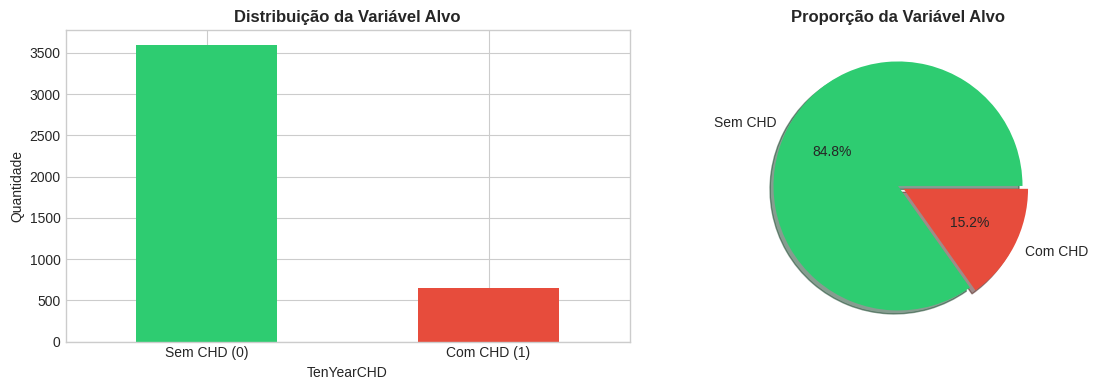

In [7]:
# ============================================================
# BLOCO 7: VISUALIZAÇÃO - GRÁFICO DE BARRAS E PIZZA (VARIÁVEL ALVO)
# ============================================================
# Visualização da distribuição da variável alvo
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de barras
colors = ['#2ecc71', '#e74c3c']
heart_df['TenYearCHD'].value_counts().plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title('Distribuição da Variável Alvo', fontsize=12, fontweight='bold')
axes[0].set_xlabel('TenYearCHD')
axes[0].set_ylabel('Quantidade')
axes[0].set_xticklabels(['Sem CHD (0)', 'Com CHD (1)'], rotation=0)

# Gráfico de pizza
axes[1].pie(target_counts, labels=['Sem CHD', 'Com CHD'], autopct='%1.1f%%',
            colors=colors, explode=[0, 0.05], shadow=True)
axes[1].set_title('Proporção da Variável Alvo', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

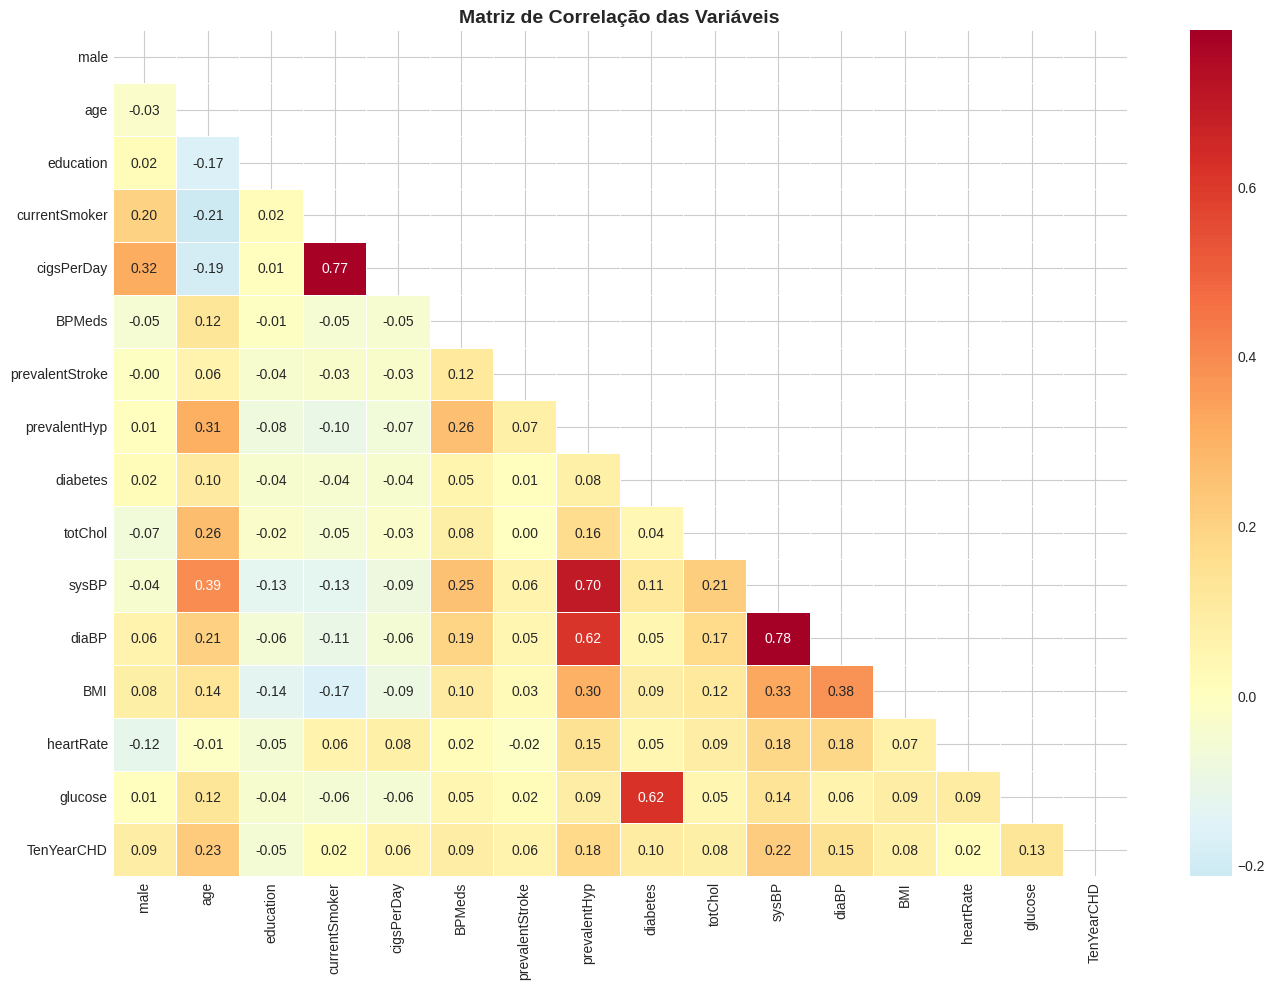

In [8]:
# ============================================================
# BLOCO 8: MATRIZ DE CORRELAÇÃO (HEATMAP)
# ============================================================
# Matriz de correlação
plt.figure(figsize=(14, 10))
correlation_matrix = heart_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='RdYlBu_r', center=0, linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [9]:
# ============================================================
# BLOCO 9: CORRELAÇÃO COM A VARIÁVEL ALVO (VALORES)
# ============================================================
# Correlação com a variável alvo
print("\n" + "=" * 60)
print("CORRELAÇÃO COM TenYearCHD (ordenado)")
print("=" * 60)
correlations = heart_df.corr()['TenYearCHD'].drop('TenYearCHD').sort_values(ascending=False)
print(correlations.round(4))


CORRELAÇÃO COM TenYearCHD (ordenado)
age                0.2253
sysBP              0.2164
prevalentHyp       0.1776
diaBP              0.1453
glucose            0.1255
diabetes           0.0973
male               0.0884
BPMeds             0.0875
totChol            0.0822
BMI                0.0752
prevalentStroke    0.0618
cigsPerDay         0.0579
heartRate          0.0229
currentSmoker      0.0195
education         -0.0541
Name: TenYearCHD, dtype: float64


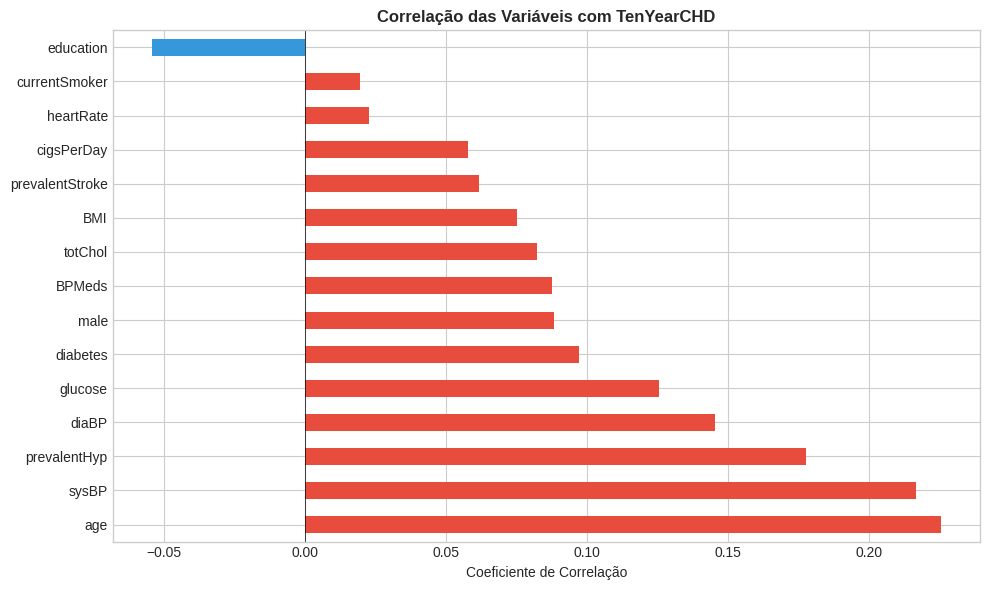

In [10]:
# ============================================================
# BLOCO 10: VISUALIZAÇÃO - GRÁFICO DE CORRELAÇÃO COM TenYearCHD
# ============================================================
# Visualização da correlação com a variável alvo
plt.figure(figsize=(10, 6))
colors = ['#e74c3c' if x > 0 else '#3498db' for x in correlations]
correlations.plot(kind='barh', color=colors)
plt.title('Correlação das Variáveis com TenYearCHD', fontsize=12, fontweight='bold')
plt.xlabel('Coeficiente de Correlação')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

## 3. Pré-processamento dos Dados

In [11]:
# ============================================================
# BLOCO 11: TRATAMENTO DE VALORES NULOS (MEDIANA)
# ============================================================
# Tratamento de valores nulos - Usando a mediana para variáveis numéricas
heart_clean = heart_df.copy()

# Preenchendo valores nulos com a mediana
for col in heart_clean.columns:
    if heart_clean[col].isnull().sum() > 0:
        heart_clean[col].fillna(heart_clean[col].median(), inplace=True)

print(f"Valores nulos após tratamento: {heart_clean.isnull().sum().sum()}")
print(f"Dimensões após limpeza: {heart_clean.shape}")

Valores nulos após tratamento: 0
Dimensões após limpeza: (4238, 16)


In [12]:
# ============================================================
# BLOCO 12: SEPARAÇÃO DE FEATURES E VARIÁVEL ALVO
# ============================================================
# Separação das features e variável alvo
X = heart_clean.drop('TenYearCHD', axis=1)
y = heart_clean['TenYearCHD']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")
print(f"\nVariáveis disponíveis: {list(X.columns)}")

Features: (4238, 15)
Target: (4238,)

Variáveis disponíveis: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [13]:
# ============================================================
# BLOCO 13: DIVISÃO TREINO/TESTE (70/30)
# ============================================================
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Treino: {X_train.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")
print(f"\nProporção CHD no treino: {y_train.mean():.4f}")
print(f"Proporção CHD no teste: {y_test.mean():.4f}")

Treino: 2966 amostras
Teste: 1272 amostras

Proporção CHD no treino: 0.1521
Proporção CHD no teste: 0.1517


In [14]:
# ============================================================
# BLOCO 14: NORMALIZAÇÃO DAS FEATURES (StandardScaler)
# ============================================================
# Normalização das features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dados normalizados com StandardScaler")

Dados normalizados com StandardScaler


## 4. Tarefa 1: Classificador de Regressão Logística (Todas as Variáveis)

In [15]:
# ============================================================
# BLOCO 15: TAREFA 1 - REGRESSÃO LOGÍSTICA (TODAS AS VARIÁVEIS)
# ============================================================
# Modelo 1: Regressão Logística com todas as variáveis
print("=" * 60)
print("MODELO 1: REGRESSÃO LOGÍSTICA (Todas as variáveis)")
print("=" * 60)

lr_all = LogisticRegression(max_iter=1000, random_state=42)
lr_all.fit(X_train_scaled, y_train)

# Predições
y_pred_lr_all = lr_all.predict(X_test_scaled)
y_proba_lr_all = lr_all.predict_proba(X_test_scaled)[:, 1]

# Métricas
print(f"\nAcurácia: {accuracy_score(y_test, y_pred_lr_all):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_lr_all):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr_all):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr_all):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_lr_all):.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr_all, target_names=['Sem CHD', 'Com CHD']))

MODELO 1: REGRESSÃO LOGÍSTICA (Todas as variáveis)

Acurácia: 0.8475
Precisão: 0.4815
Recall: 0.0674
F1-Score: 0.1182
AUC-ROC: 0.7020

Relatório de Classificação:
              precision    recall  f1-score   support

     Sem CHD       0.86      0.99      0.92      1079
     Com CHD       0.48      0.07      0.12       193

    accuracy                           0.85      1272
   macro avg       0.67      0.53      0.52      1272
weighted avg       0.80      0.85      0.80      1272




Coeficientes da Regressão Logística (importância das variáveis):
       Variável  Coeficiente
            age     0.573186
          sysBP     0.338910
     cigsPerDay     0.329761
           male     0.210920
        glucose     0.150200
        totChol     0.118615
prevalentStroke     0.108062
   prevalentHyp     0.084204
         BPMeds     0.078503
       diabetes     0.027359
            BMI     0.008544
      education     0.007083
      heartRate    -0.022120
          diaBP    -0.033306
  currentSmoker    -0.041598


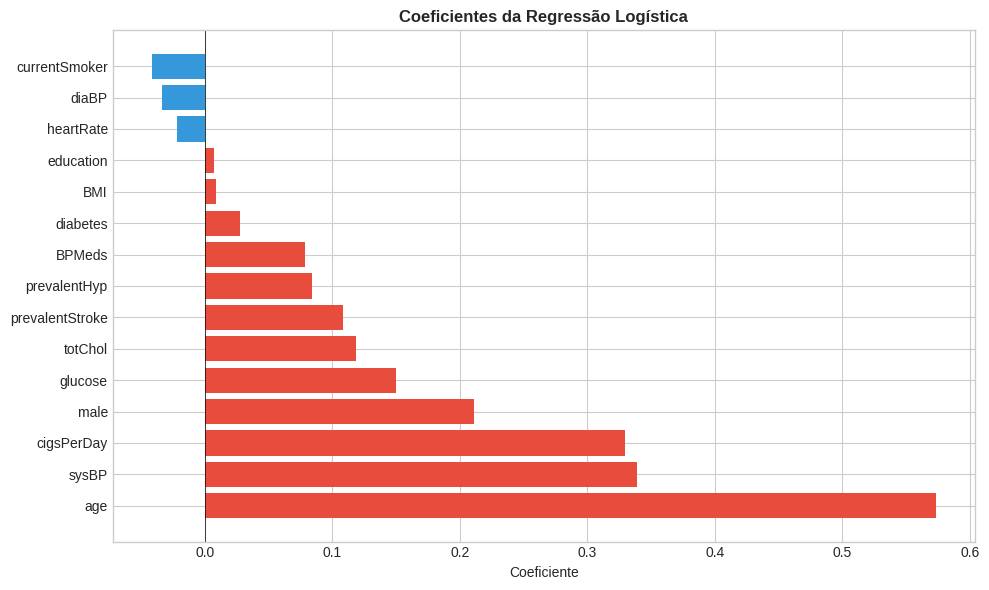

In [16]:
# ============================================================
# BLOCO 16: COEFICIENTES DO MODELO - IMPORTÂNCIA DAS VARIÁVEIS
# ============================================================
# Coeficientes do modelo
coef_df = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': lr_all.coef_[0]
}).sort_values('Coeficiente', ascending=False)

print("\nCoeficientes da Regressão Logística (importância das variáveis):")
print(coef_df.to_string(index=False))

# Visualização dos coeficientes
plt.figure(figsize=(10, 6))
colors = ['#e74c3c' if x > 0 else '#3498db' for x in coef_df['Coeficiente']]
plt.barh(coef_df['Variável'], coef_df['Coeficiente'], color=colors)
plt.title('Coeficientes da Regressão Logística', fontsize=12, fontweight='bold')
plt.xlabel('Coeficiente')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

## 5. Tarefa 2: Experimentando Combinações de Variáveis

In [17]:
# ============================================================
# BLOCO 17: TAREFA 2 - DEFINIÇÃO DOS CONJUNTOS DE VARIÁVEIS
# ============================================================
# Baseado na análise de correlação e coeficientes, vamos testar diferentes combinações

# Conjunto 1: Variáveis mais correlacionadas com TenYearCHD
features_set1 = ['age', 'sysBP', 'prevalentHyp', 'glucose', 'male', 'cigsPerDay']

# Conjunto 2: Variáveis clínicas principais
features_set2 = ['age', 'sysBP', 'diaBP', 'totChol', 'BMI', 'heartRate', 'glucose']

# Conjunto 3: Fatores de risco cardiovascular tradicionais
features_set3 = ['age', 'male', 'currentSmoker', 'cigsPerDay', 'prevalentHyp',
                 'diabetes', 'totChol', 'sysBP', 'BMI']

# Conjunto 4: Variáveis com maiores coeficientes absolutos
features_set4 = ['age', 'male', 'sysBP', 'glucose', 'prevalentStroke', 'cigsPerDay']

# Conjunto 5: Modelo minimalista (top 4 variáveis)
features_set5 = ['age', 'sysBP', 'male', 'glucose']

feature_sets = {
    'Conjunto 1 (Correlação)': features_set1,
    'Conjunto 2 (Clínicas)': features_set2,
    'Conjunto 3 (Fatores de Risco)': features_set3,
    'Conjunto 4 (Coeficientes)': features_set4,
    'Conjunto 5 (Minimalista)': features_set5
}

In [18]:
# ============================================================
# BLOCO 18: FUNÇÃO PARA TREINAR E AVALIAR MODELOS
# ============================================================
# Função para treinar e avaliar modelos
def evaluate_model(X_train, X_test, y_train, y_test, model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Probabilidades (para modelos que suportam)
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    results = {
        'Modelo': model_name,
        'Acurácia': accuracy_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, zero_division=0),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }

    return results, y_proba

In [19]:
# ============================================================
# BLOCO 19: AVALIAÇÃO DOS CONJUNTOS DE VARIÁVEIS
# ============================================================
# Avaliando diferentes conjuntos de variáveis com Regressão Logística
print("=" * 70)
print("COMPARAÇÃO DE DIFERENTES CONJUNTOS DE VARIÁVEIS (Regressão Logística)")
print("=" * 70)

lr_results = []
lr_probas = {}

for name, features in feature_sets.items():
    # Preparar dados
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    # Normalizar
    scaler_subset = StandardScaler()
    X_train_subset_scaled = scaler_subset.fit_transform(X_train_subset)
    X_test_subset_scaled = scaler_subset.transform(X_test_subset)

    # Treinar e avaliar
    lr_model = LogisticRegression(max_iter=1000, random_state=42)
    results, y_proba = evaluate_model(
        X_train_subset_scaled, X_test_subset_scaled,
        y_train, y_test, lr_model, name
    )
    results['Num_Variáveis'] = len(features)
    lr_results.append(results)
    lr_probas[name] = y_proba
    print(f"\n{name}:")
    print(f"  Variáveis: {features}")
    print(f"  AUC-ROC: {results['AUC-ROC']:.4f}")

COMPARAÇÃO DE DIFERENTES CONJUNTOS DE VARIÁVEIS (Regressão Logística)

Conjunto 1 (Correlação):
  Variáveis: ['age', 'sysBP', 'prevalentHyp', 'glucose', 'male', 'cigsPerDay']
  AUC-ROC: 0.7066

Conjunto 2 (Clínicas):
  Variáveis: ['age', 'sysBP', 'diaBP', 'totChol', 'BMI', 'heartRate', 'glucose']
  AUC-ROC: 0.6765

Conjunto 3 (Fatores de Risco):
  Variáveis: ['age', 'male', 'currentSmoker', 'cigsPerDay', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'BMI']
  AUC-ROC: 0.7055

Conjunto 4 (Coeficientes):
  Variáveis: ['age', 'male', 'sysBP', 'glucose', 'prevalentStroke', 'cigsPerDay']
  AUC-ROC: 0.7046

Conjunto 5 (Minimalista):
  Variáveis: ['age', 'sysBP', 'male', 'glucose']
  AUC-ROC: 0.6997


In [20]:
# ============================================================
# BLOCO 20: RESUMO DOS RESULTADOS (TABELA COMPARATIVA)
# ============================================================
# Adicionando o modelo com todas as variáveis
lr_results.append({
    'Modelo': 'Todas as Variáveis',
    'Acurácia': accuracy_score(y_test, y_pred_lr_all),
    'Precisão': precision_score(y_test, y_pred_lr_all),
    'Recall': recall_score(y_test, y_pred_lr_all),
    'F1-Score': f1_score(y_test, y_pred_lr_all),
    'AUC-ROC': roc_auc_score(y_test, y_proba_lr_all),
    'Num_Variáveis': X.shape[1]
})
lr_probas['Todas as Variáveis'] = y_proba_lr_all

# DataFrame com resultados
lr_results_df = pd.DataFrame(lr_results)
lr_results_df = lr_results_df.sort_values('AUC-ROC', ascending=False)

print("\n" + "=" * 70)
print("RESUMO DOS RESULTADOS (ordenado por AUC-ROC)")
print("=" * 70)
print(lr_results_df.to_string(index=False))


RESUMO DOS RESULTADOS (ordenado por AUC-ROC)
                       Modelo  Acurácia  Precisão   Recall  F1-Score  AUC-ROC  Num_Variáveis
      Conjunto 1 (Correlação)  0.844340  0.400000 0.051813  0.091743 0.706642              6
Conjunto 3 (Fatores de Risco)  0.845912  0.434783 0.051813  0.092593 0.705513              9
    Conjunto 4 (Coeficientes)  0.843553  0.392857 0.056995  0.099548 0.704586              6
           Todas as Variáveis  0.847484  0.481481 0.067358  0.118182 0.702027             15
     Conjunto 5 (Minimalista)  0.850629  0.578947 0.056995  0.103774 0.699712              4
        Conjunto 2 (Clínicas)  0.849843  0.571429 0.041451  0.077295 0.676500              7


In [21]:
# ============================================================
# BLOCO 21: IDENTIFICAÇÃO DO MELHOR MODELO
# ============================================================
# Identificar o melhor modelo de Regressão Logística
best_lr_model = lr_results_df.iloc[0]['Modelo']
best_lr_auc = lr_results_df.iloc[0]['AUC-ROC']
print(f"\nMelhor modelo de Regressão Logística: {best_lr_model}")
print(f"AUC-ROC: {best_lr_auc:.4f}")


Melhor modelo de Regressão Logística: Conjunto 1 (Correlação)
AUC-ROC: 0.7066


## 6. Tarefa 3: Curvas ROC e AUC para Comparação

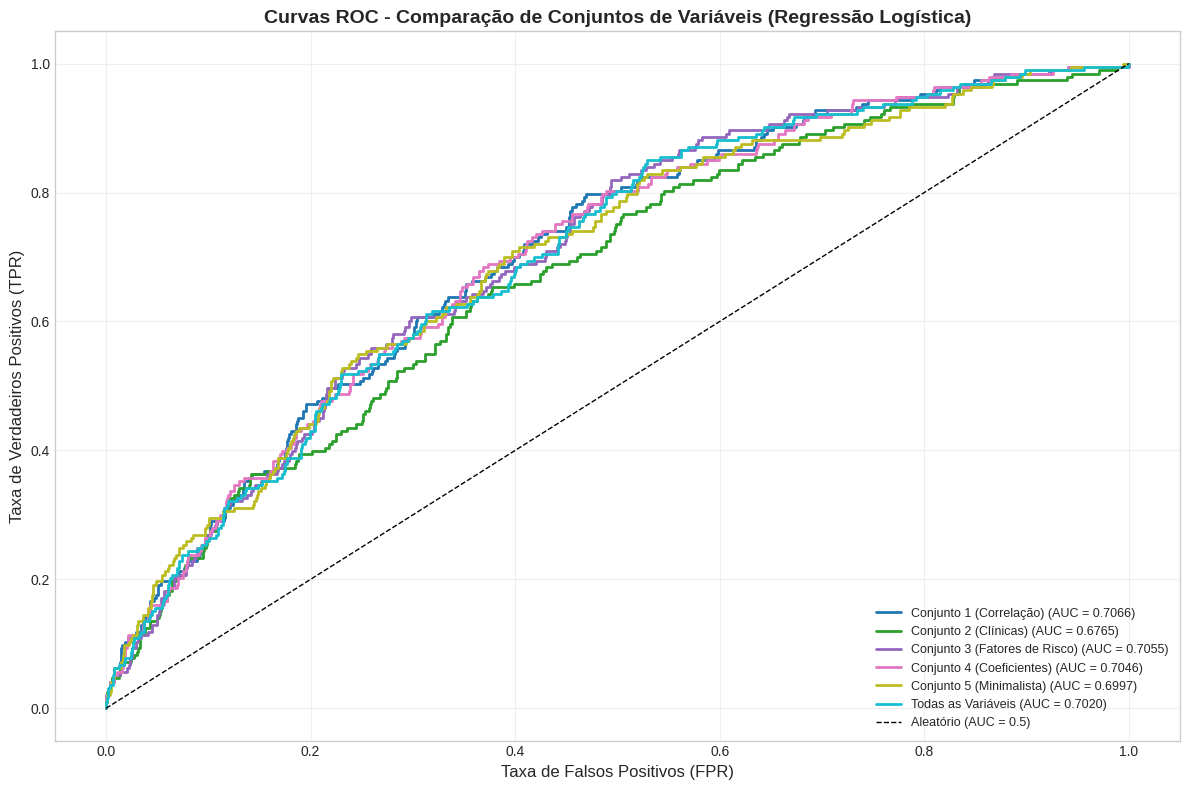

In [22]:
# ============================================================
# BLOCO 22: TAREFA 3 - CURVAS ROC (CONJUNTOS DE VARIÁVEIS)
# ============================================================
# Plotando curvas ROC para os diferentes conjuntos de variáveis
plt.figure(figsize=(12, 8))

colors = plt.cm.tab10(np.linspace(0, 1, len(lr_probas)))

for (name, y_proba), color in zip(lr_probas.items(), colors):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})', color=color, linewidth=2)

# Linha de referência (classificador aleatório)
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.5)', linewidth=1)

plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
plt.title('Curvas ROC - Comparação de Conjuntos de Variáveis (Regressão Logística)',
          fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

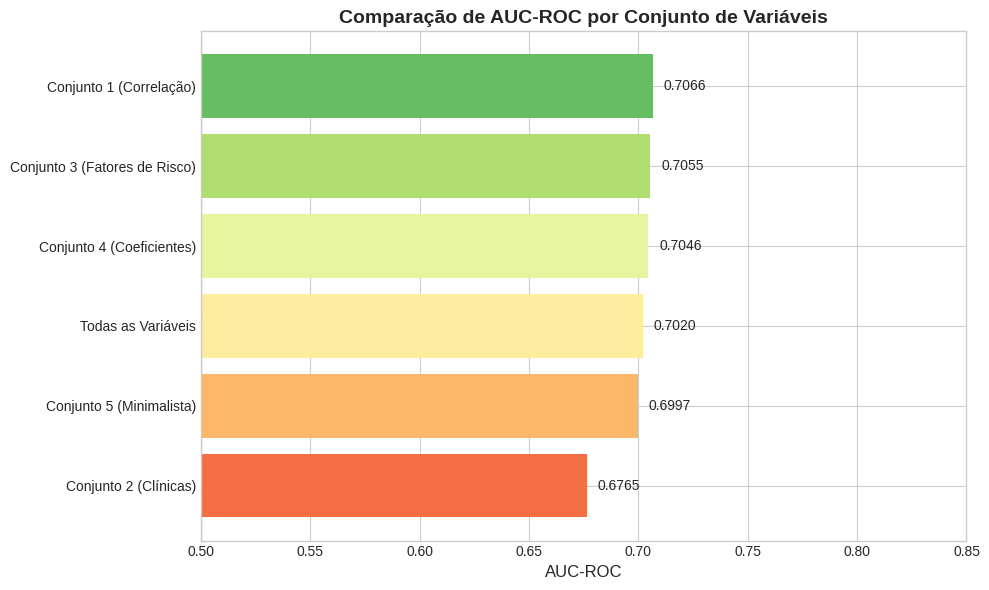

In [23]:
# ============================================================
# BLOCO 23: GRÁFICO COMPARATIVO DE AUC POR CONJUNTO
# ============================================================
# Visualização comparativa das AUC
plt.figure(figsize=(10, 6))
sorted_results = lr_results_df.sort_values('AUC-ROC', ascending=True)
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(sorted_results)))
plt.barh(sorted_results['Modelo'], sorted_results['AUC-ROC'], color=colors)
plt.xlabel('AUC-ROC', fontsize=12)
plt.title('Comparação de AUC-ROC por Conjunto de Variáveis', fontsize=14, fontweight='bold')
plt.axvline(x=0.5, color='red', linestyle='--', label='Classificador Aleatório')
for i, (idx, row) in enumerate(sorted_results.iterrows()):
    plt.text(row['AUC-ROC'] + 0.005, i, f"{row['AUC-ROC']:.4f}", va='center', fontsize=10)
plt.xlim(0.5, 0.85)
plt.tight_layout()
plt.show()

## 7. Tarefa 4: Comparação com SVM e KNN

In [24]:
# ============================================================
# BLOCO 24: TAREFA 4 - INÍCIO DA COMPARAÇÃO ENTRE CLASSIFICADORES
# ============================================================
# Usando o melhor conjunto de variáveis identificado (ou todas as variáveis para comparação justa)
print("=" * 70)
print("COMPARAÇÃO ENTRE CLASSIFICADORES: Regressão Logística vs SVM vs KNN")
print("=" * 70)
print("\nUsando todas as variáveis para comparação justa entre algoritmos")

COMPARAÇÃO ENTRE CLASSIFICADORES: Regressão Logística vs SVM vs KNN

Usando todas as variáveis para comparação justa entre algoritmos


In [25]:
# ============================================================
# BLOCO 25: MODELO 1 - REGRESSÃO LOGÍSTICA
# ============================================================
# Modelo 1: Regressão Logística (já treinado)
print("\n" + "-" * 50)
print("1. REGRESSÃO LOGÍSTICA")
print("-" * 50)
lr_final = LogisticRegression(max_iter=1000, random_state=42)
lr_final.fit(X_train_scaled, y_train)
y_pred_lr = lr_final.predict(X_test_scaled)
y_proba_lr = lr_final.predict_proba(X_test_scaled)[:, 1]

print(f"Acurácia: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_lr):.4f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_lr))


--------------------------------------------------
1. REGRESSÃO LOGÍSTICA
--------------------------------------------------
Acurácia: 0.8475
AUC-ROC: 0.7020

Matriz de Confusão:
[[1065   14]
 [ 180   13]]


In [26]:
# ============================================================
# BLOCO 26: MODELO 2 - SVM (SUPPORT VECTOR MACHINE)
# ============================================================
# Modelo 2: SVM (Support Vector Machine)
print("\n" + "-" * 50)
print("2. SVM (Support Vector Machine)")
print("-" * 50)

# SVM com kernel RBF e probabilidade habilitada
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

print(f"Acurácia: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_svm):.4f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_svm))


--------------------------------------------------
2. SVM (Support Vector Machine)
--------------------------------------------------
Acurácia: 0.8498
AUC-ROC: 0.5747

Matriz de Confusão:
[[1076    3]
 [ 188    5]]


In [27]:
# ============================================================
# BLOCO 27: MODELO 3 - KNN (K-NEAREST NEIGHBORS)
# ============================================================
# Modelo 3: KNN (K-Nearest Neighbors)
print("\n" + "-" * 50)
print("3. KNN (K-Nearest Neighbors)")
print("-" * 50)

# Testando diferentes valores de K para encontrar o melhor
k_values = [3, 5, 7, 9, 11, 15, 21]
best_k = 5
best_auc_knn = 0

print("Testando diferentes valores de K:")
for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    y_proba_temp = knn_temp.predict_proba(X_test_scaled)[:, 1]
    auc_temp = roc_auc_score(y_test, y_proba_temp)
    print(f"  K={k}: AUC-ROC = {auc_temp:.4f}")
    if auc_temp > best_auc_knn:
        best_auc_knn = auc_temp
        best_k = k

print(f"\nMelhor K: {best_k}")

# Treinando KNN com o melhor K
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
y_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

print(f"\nAcurácia: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_knn):.4f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_knn))


--------------------------------------------------
3. KNN (K-Nearest Neighbors)
--------------------------------------------------
Testando diferentes valores de K:
  K=3: AUC-ROC = 0.5789
  K=5: AUC-ROC = 0.6180
  K=7: AUC-ROC = 0.6254
  K=9: AUC-ROC = 0.6350
  K=11: AUC-ROC = 0.6488
  K=15: AUC-ROC = 0.6556
  K=21: AUC-ROC = 0.6618

Melhor K: 21

Acurácia: 0.8467
AUC-ROC: 0.6618

Matriz de Confusão:
[[1072    7]
 [ 188    5]]


In [28]:
# ============================================================
# BLOCO 28: TABELA COMPARATIVA FINAL DOS CLASSIFICADORES
# ============================================================
# Tabela comparativa final
print("\n" + "=" * 70)
print("TABELA COMPARATIVA FINAL")
print("=" * 70)

comparison_results = [
    {
        'Classificador': 'Regressão Logística',
        'Acurácia': accuracy_score(y_test, y_pred_lr),
        'Precisão': precision_score(y_test, y_pred_lr),
        'Recall': recall_score(y_test, y_pred_lr),
        'F1-Score': f1_score(y_test, y_pred_lr),
        'AUC-ROC': roc_auc_score(y_test, y_proba_lr)
    },
    {
        'Classificador': 'SVM (RBF)',
        'Acurácia': accuracy_score(y_test, y_pred_svm),
        'Precisão': precision_score(y_test, y_pred_svm),
        'Recall': recall_score(y_test, y_pred_svm),
        'F1-Score': f1_score(y_test, y_pred_svm),
        'AUC-ROC': roc_auc_score(y_test, y_proba_svm)
    },
    {
        'Classificador': f'KNN (K={best_k})',
        'Acurácia': accuracy_score(y_test, y_pred_knn),
        'Precisão': precision_score(y_test, y_pred_knn),
        'Recall': recall_score(y_test, y_pred_knn),
        'F1-Score': f1_score(y_test, y_pred_knn),
        'AUC-ROC': roc_auc_score(y_test, y_proba_knn)
    }
]

comparison_df = pd.DataFrame(comparison_results)
comparison_df = comparison_df.round(4)
print(comparison_df.to_string(index=False))


TABELA COMPARATIVA FINAL
      Classificador  Acurácia  Precisão  Recall  F1-Score  AUC-ROC
Regressão Logística    0.8475    0.4815  0.0674    0.1182   0.7020
          SVM (RBF)    0.8498    0.6250  0.0259    0.0498   0.5747
         KNN (K=21)    0.8467    0.4167  0.0259    0.0488   0.6618


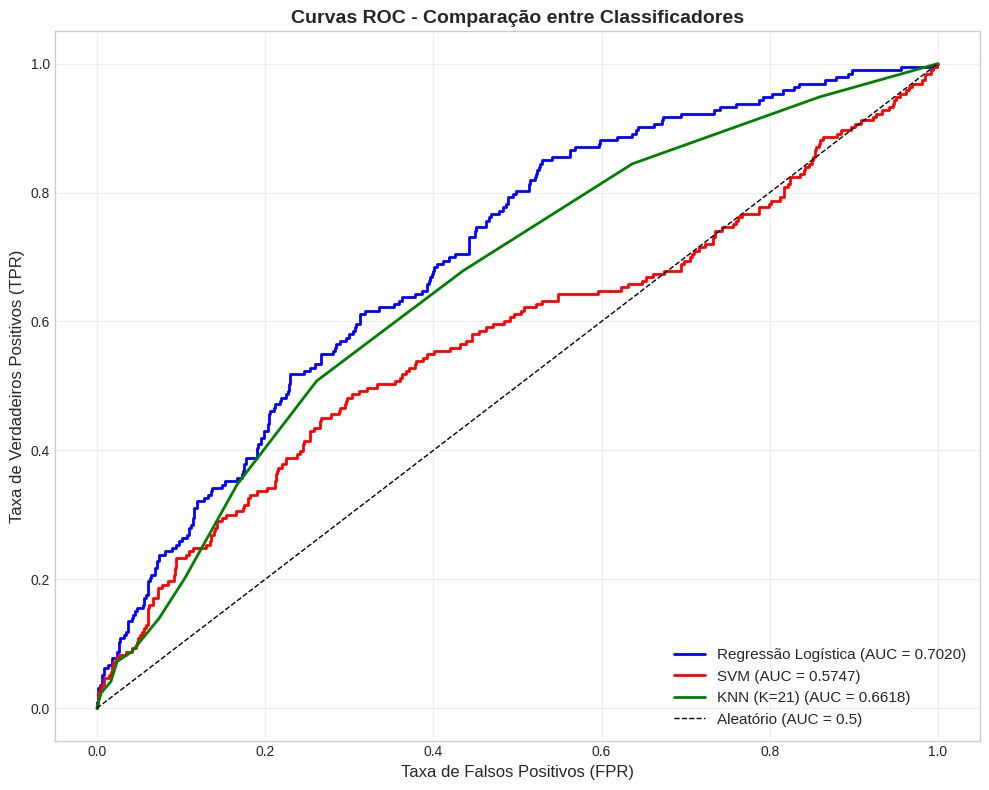

In [29]:
# ============================================================
# BLOCO 29: CURVAS ROC - COMPARAÇÃO ENTRE CLASSIFICADORES
# ============================================================
# Curvas ROC comparativas - TODOS OS CLASSIFICADORES
plt.figure(figsize=(10, 8))

# Regressão Logística
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Regressão Logística (AUC = {auc_lr:.4f})',
         color='blue', linewidth=2)

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
auc_svm = roc_auc_score(y_test, y_proba_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.4f})',
         color='red', linewidth=2)

# KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (K={best_k}) (AUC = {auc_knn:.4f})',
         color='green', linewidth=2)

# Linha de referência
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.5)', linewidth=1)

plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
plt.title('Curvas ROC - Comparação entre Classificadores', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

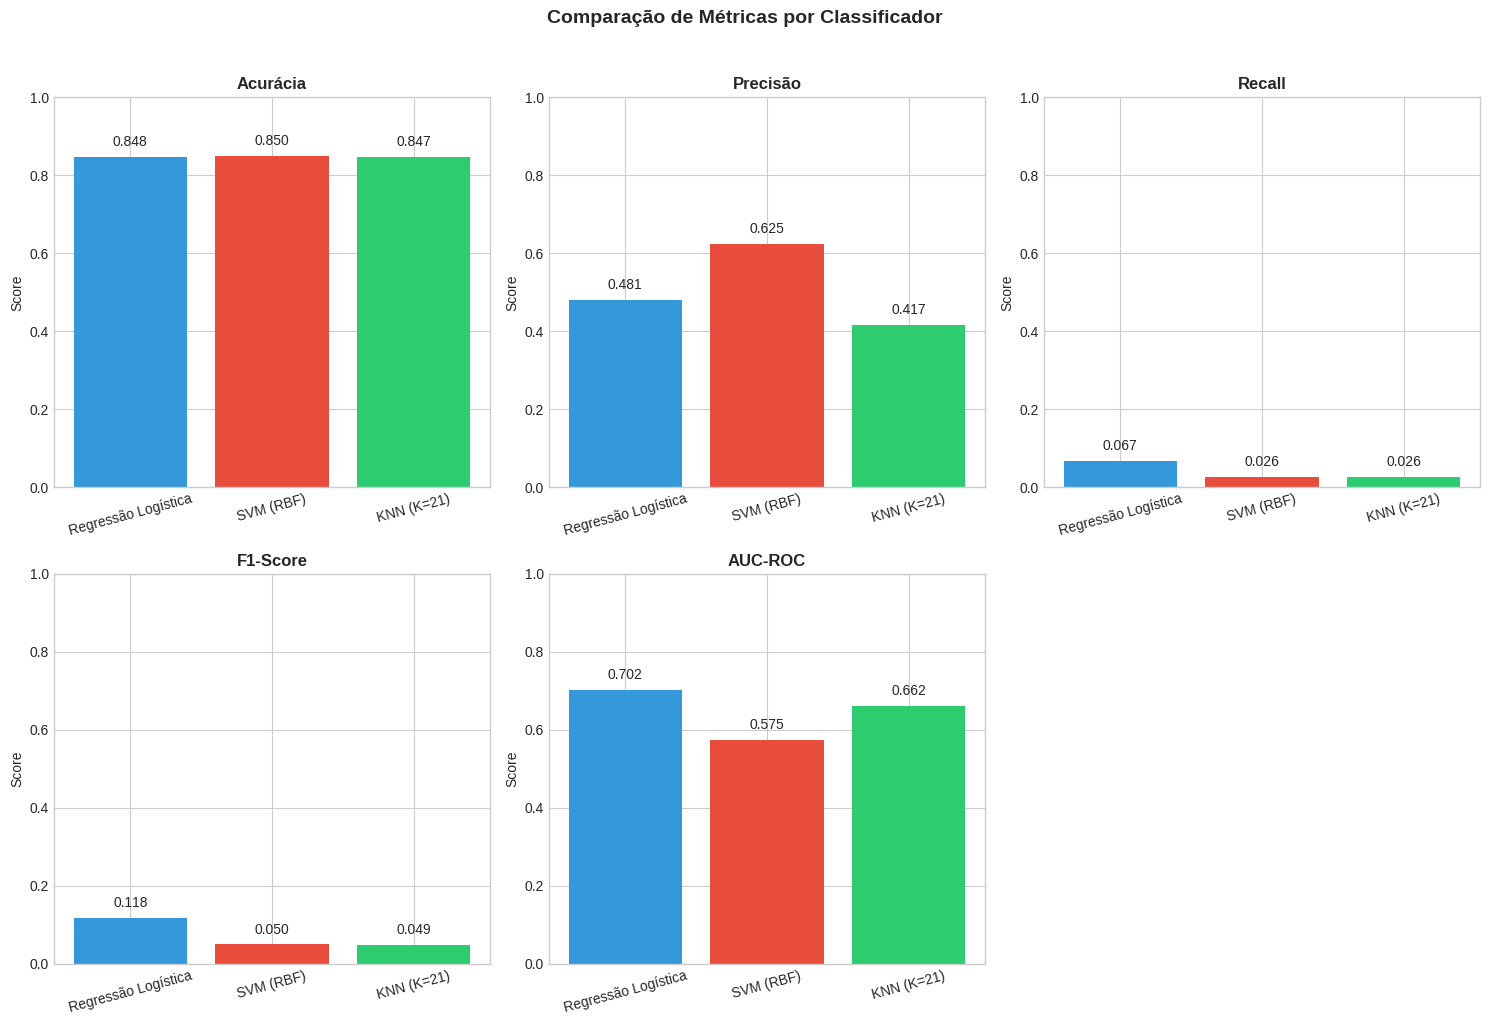

In [30]:
# ============================================================
# BLOCO 30: GRÁFICOS DE MÉTRICAS POR CLASSIFICADOR
# ============================================================
# Visualização das métricas por classificador
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

metrics = ['Acurácia', 'Precisão', 'Recall', 'F1-Score', 'AUC-ROC']
colors = ['#3498db', '#e74c3c', '#2ecc71']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    values = comparison_df[metric].values
    classifiers = comparison_df['Classificador'].values

    bars = ax.bar(classifiers, values, color=colors)
    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.set_ylim(0, 1)
    ax.set_ylabel('Score')

    # Adicionar valores nas barras
    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                f'{value:.3f}', ha='center', va='bottom', fontsize=10)

    ax.tick_params(axis='x', rotation=15)

# Remover o subplot vazio
axes[1, 2].axis('off')

plt.suptitle('Comparação de Métricas por Classificador', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

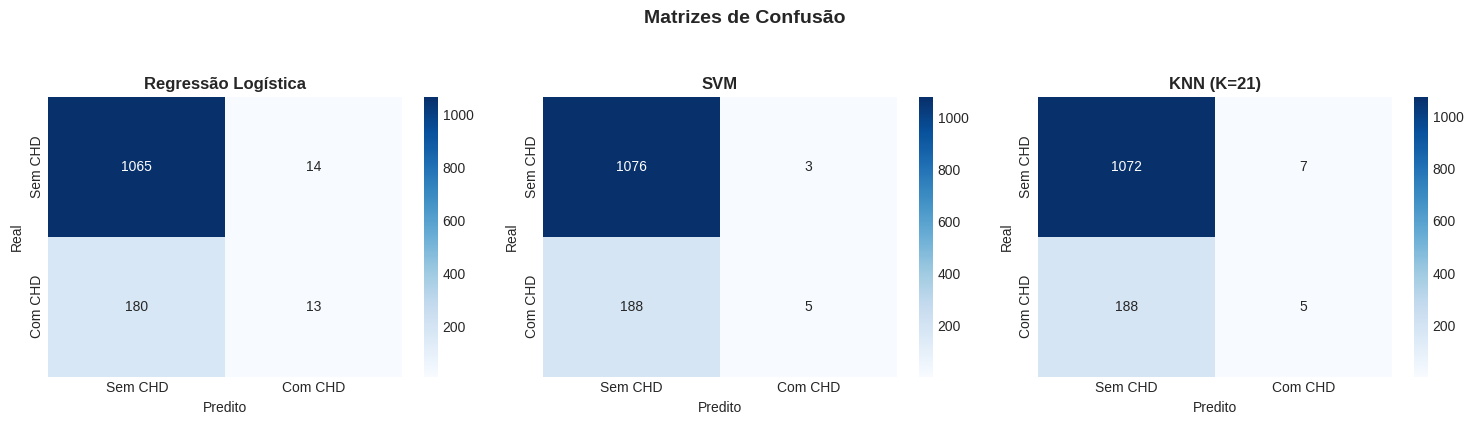

In [31]:
# ============================================================
# BLOCO 31: MATRIZES DE CONFUSÃO LADO A LADO
# ============================================================
# Matrizes de Confusão lado a lado
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

cms = [
    (confusion_matrix(y_test, y_pred_lr), 'Regressão Logística'),
    (confusion_matrix(y_test, y_pred_svm), 'SVM'),
    (confusion_matrix(y_test, y_pred_knn), f'KNN (K={best_k})')
]

for ax, (cm, title) in zip(axes, cms):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Sem CHD', 'Com CHD'],
                yticklabels=['Sem CHD', 'Com CHD'])
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Predito')
    ax.set_ylabel('Real')

plt.suptitle('Matrizes de Confusão', fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

## 8. Conclusões e Análise Final

In [32]:
# ============================================================
# BLOCO 32: CONCLUSÕES E ANÁLISE FINAL
# ============================================================
print("=" * 70)
print("CONCLUSÕES E ANÁLISE FINAL")
print("=" * 70)

# Encontrar o melhor classificador
best_classifier = comparison_df.loc[comparison_df['AUC-ROC'].idxmax()]

print("\n1. MELHOR CLASSIFICADOR (baseado em AUC-ROC):")
print(f"   {best_classifier['Classificador']} com AUC-ROC = {best_classifier['AUC-ROC']:.4f}")

print("\n2. ANÁLISE DO DESBALANCEAMENTO:")
print(f"   - Dataset original: ~{(y.mean()*100):.1f}% casos positivos (CHD)")
print("   - Isso afeta principalmente o Recall dos classificadores")
print("   - AUC-ROC é mais robusta para datasets desbalanceados")

print("\n3. COMPARAÇÃO DOS CLASSIFICADORES:")
print(f"   - Regressão Logística: AUC = {auc_lr:.4f} (interpretável, rápido)")
print(f"   - SVM: AUC = {auc_svm:.4f} (bom para dados não-lineares)")
print(f"   - KNN: AUC = {auc_knn:.4f} (simples, baseado em distância)")

print("\n4. VARIÁVEIS MAIS IMPORTANTES (Correlação com TenYearCHD):")
top_vars = correlations.head(5)
for var, corr in top_vars.items():
    print(f"   - {var}: {corr:.4f}")

print("\n5. RECOMENDAÇÕES:")
print("   - Para interpretabilidade: Regressão Logística")
print("   - Para performance: SVM com kernel RBF")
print("   - Considerar técnicas de balanceamento (SMOTE, undersampling)")
print("   - Ajuste de hiperparâmetros pode melhorar resultados")

CONCLUSÕES E ANÁLISE FINAL

1. MELHOR CLASSIFICADOR (baseado em AUC-ROC):
   Regressão Logística com AUC-ROC = 0.7020

2. ANÁLISE DO DESBALANCEAMENTO:
   - Dataset original: ~15.2% casos positivos (CHD)
   - Isso afeta principalmente o Recall dos classificadores
   - AUC-ROC é mais robusta para datasets desbalanceados

3. COMPARAÇÃO DOS CLASSIFICADORES:
   - Regressão Logística: AUC = 0.7020 (interpretável, rápido)
   - SVM: AUC = 0.5747 (bom para dados não-lineares)
   - KNN: AUC = 0.6618 (simples, baseado em distância)

4. VARIÁVEIS MAIS IMPORTANTES (Correlação com TenYearCHD):
   - age: 0.2253
   - sysBP: 0.2164
   - prevalentHyp: 0.1776
   - diaBP: 0.1453
   - glucose: 0.1255

5. RECOMENDAÇÕES:
   - Para interpretabilidade: Regressão Logística
   - Para performance: SVM com kernel RBF
   - Considerar técnicas de balanceamento (SMOTE, undersampling)
   - Ajuste de hiperparâmetros pode melhorar resultados


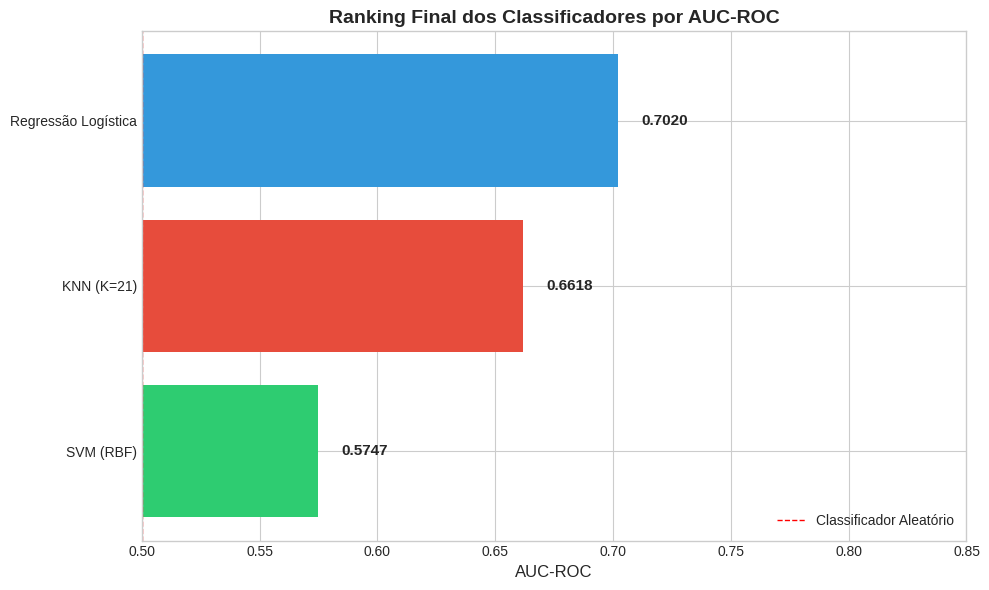


FIM DA ANÁLISE


In [33]:
# ============================================================
# BLOCO 33: RANKING FINAL DOS CLASSIFICADORES (GRÁFICO)
# ============================================================
# Resumo visual final
fig, ax = plt.subplots(figsize=(10, 6))

comparison_sorted = comparison_df.sort_values('AUC-ROC', ascending=True)
colors = ['#2ecc71', '#e74c3c', '#3498db']

bars = ax.barh(comparison_sorted['Classificador'], comparison_sorted['AUC-ROC'], color=colors)
ax.set_xlabel('AUC-ROC', fontsize=12)
ax.set_title('Ranking Final dos Classificadores por AUC-ROC', fontsize=14, fontweight='bold')
ax.axvline(x=0.5, color='red', linestyle='--', linewidth=1, label='Classificador Aleatório')

for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
            f'{width:.4f}', ha='left', va='center', fontsize=11, fontweight='bold')

ax.set_xlim(0.5, 0.85)
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("FIM DA ANÁLISE")
print("=" * 70)